# 1. Load libraries and data

In [22]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
#Load Dataset
data=pd.read_csv('./weatherconditions.csv')
data.head()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,15.8263,1015.13
1,9.355556,0.86,14.2646,15.8263,1015.63
2,9.377778,0.89,3.9284,14.9569,1015.94
3,8.288889,0.83,14.1036,15.8263,1016.41
4,8.755556,0.83,11.0446,15.8263,1016.51


# 2. Key statistics

In [24]:
#Show Key Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


#3. Data visualization

## 3.1. Boxplots

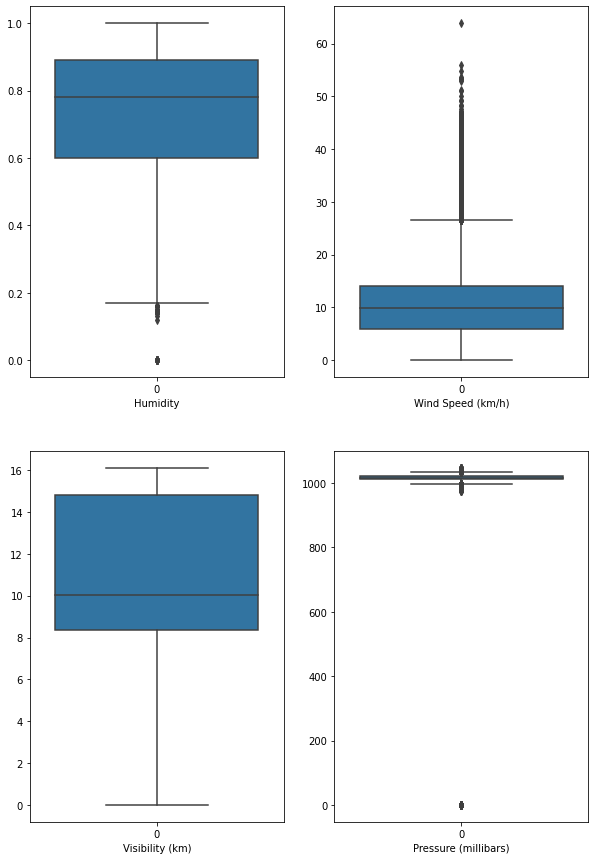

In [25]:
#Boxplots for independent variables
plt.figure(figsize=(10,15))
cnt = 1

for col in data.columns:
    if (col == 'Temperature (C)'):
        continue
  
    plt.subplot(2, 2, cnt)
    bp = sns.boxplot(data=data[col])
    bp.set_xlabel(col)
    cnt += 1    

## 3.2. Scatterplots

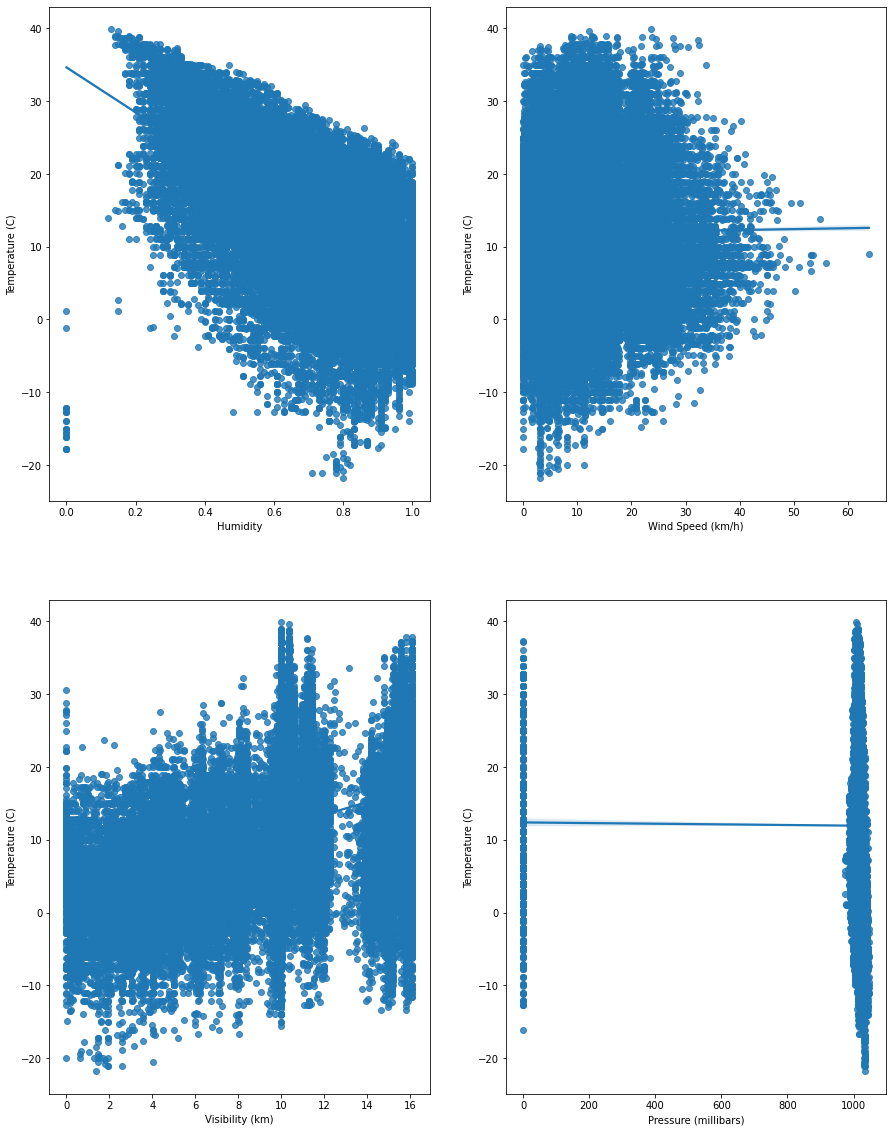

In [26]:
#Scatterplots - Temperature (C) vs. Independent Variables

plt.figure(figsize = (15, 20))

cnt = 1
for col in data.columns:
    if (col == 'Temperature (C)'):
        continue
    
    plt.subplot(2, 2, cnt)
    sp = sns.regplot(x = data[col], y = data['Temperature (C)'])
    sp.set_xlabel(col)
    sp.set_ylabel('Temperature (C)')
    cnt += 1    

In [27]:
#Correlation between Temperature (C) and explanatory variables
data.corr().iloc[1:, 0]

Humidity               -0.632255
Wind Speed (km/h)       0.008957
Visibility (km)         0.392847
Pressure (millibars)   -0.005447
Name: Temperature (C), dtype: float64

# 4. Machine learning 

## 4.1. Modeling

In [28]:
#Define x and y variable
x = data.drop(['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)'],axis=1).to_numpy()
y = data['Temperature (C)'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

## 4.2. Linear regression script

In [29]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

## 4.3. Metrics

In [30]:
print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),data.drop(['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)'],axis=1).columns,columns=['Coefficients'])
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 

Method: Linear Regression

Intercept: 11.90
                 Coefficients
Humidity            -5.409201
Visibility (km)      1.754249

R2: 0.43
Adj_R2: 0.43

Mean Absolute Error: 5.83
Mean Squared Error: 51.60
Root Mean Squared Error: 7.18


## 4.4. Forecasting

In [31]:
#Forecast Table
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test.round(1),'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,22.2,11.6,-10.6
1,4.8,14.4,9.6
2,14.4,3.0,-11.4
3,12.8,6.0,-6.8
4,21.7,15.0,-6.7
